# US census

### Data Lit  |  Homework Assignment | Logistic Regression

by Denis Volchugin in April 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set()
%matplotlib inline

In [2]:
train = pd.read_csv ('../Data/adult-training.csv')
test = pd.read_csv ('../Data/adult-test.csv', skiprows=1)

### DATA EXPLORATION

In [3]:
train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
test.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [5]:
names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income_bracket",
]

In [6]:
train.columns, test.columns = names, names

In [7]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32560,NaN,NaN,NaN,38.5816,13.6406,17,28,37,48,90
workclass,32560,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32560,NaN,NaN,NaN,189782,105550,12285,117832,178363,237054,1.48470e+06
education,32560,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32560,NaN,NaN,NaN,10.0806,2.57271,1,9,10,12,16
marital_status,32560,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32560,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32560,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32560,5,White,27815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,32560,2,Male,21789,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,16280,NaN,NaN,NaN,38.7683,13.8492,17,28,37,48,90
workclass,16280,9,Private,11209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16280,NaN,NaN,NaN,189433,105718,13492,116716,177830,238384,1.4904e+06
education,16280,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,16280,NaN,NaN,NaN,10.0731,2.56751,1,9,10,12,16
marital_status,16280,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,16280,15,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,16280,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,16280,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,16280,2,Male,10859,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cats = [
    "workclass",
    "education",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "native_country",
]

In [10]:
nums = [
    "age",
    "fnlwgt",
    "education_num",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
]

In [11]:
pd.Series(train.education_num.values, train.education).to_dict()

{' Bachelors': 13,
 ' HS-grad': 9,
 ' 11th': 7,
 ' Masters': 14,
 ' 9th': 5,
 ' Some-college': 10,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 11,
 ' 7th-8th': 4,
 ' Doctorate': 16,
 ' Prof-school': 15,
 ' 5th-6th': 3,
 ' 10th': 6,
 ' 1st-4th': 2,
 ' Preschool': 1,
 ' 12th': 8}

In [12]:
T = {' >50K': 1, ' <=50K': 0}

In [13]:
train['target'] = train.income_bracket.map(T)

### CORRELATION MATRIX

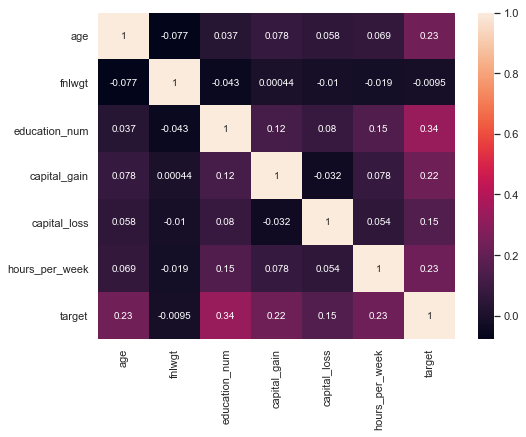

In [14]:
corrmatrix = train.corr(method='pearson')
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corrmatrix, annot=True);

In [15]:
# It is quite obvious that education, hours per week and age do influence on income. 
# Let's check if categoricals do or do not?

#### Categorical variables

In [16]:
for cat in cats:
    print(cat, ":", train[cat].nunique(), "\n", train[cat].unique(), "\n")

workclass : 9 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education : 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital_status : 7 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation : 15 
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv'] 

relationship : 6 
 [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race : 5 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

gender : 2 
 [' Male' ' Female'] 



In [17]:
train.replace (' ?', 'Unknown', inplace=True)
test.replace (' ?', 'Unknown', inplace=True)

##### Workclass

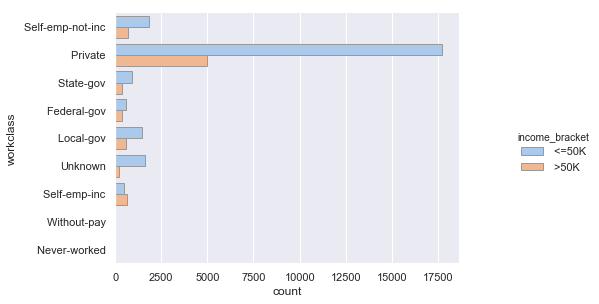

In [18]:
sns.catplot(
    y="workclass",
    hue="income_bracket",
    kind="count",
    palette="pastel",
    edgecolor=".6",
    data=train,
).fig.set_size_inches(10, 4)

In [19]:
# just like education was evaluated from 1 to 16 i will do so for workclass (100% = 16)

In [20]:
WC = train.pivot_table(values="target", index="workclass", aggfunc="mean")
WC["num"] = (WC.target * 16).round()
WC

,target,num
workclass,,
Federal-gov,0.386458,6.0
Local-gov,0.294792,5.0
Never-worked,0.000000,0.0
Private,0.218673,3.0
Self-emp-inc,0.557348,9.0
Self-emp-not-inc,0.284927,5.0
State-gov,0.272167,4.0
Without-pay,0.000000,0.0
Unknown,0.104031,2.0


In [21]:
train['workclass_num'] = train.workclass.map (WC.num)

##### Marital Status

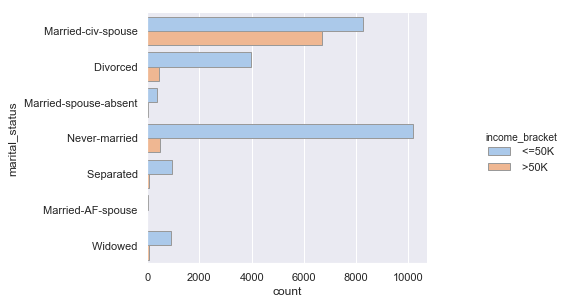

In [22]:
sns.catplot(
    y="marital_status",
    hue="income_bracket",
    kind="count",
    palette="pastel",
    edgecolor=".6",
    data=train,
).fig.set_size_inches(10, 4)

In [23]:
MS = train.pivot_table(values="target", index="marital_status", aggfunc="mean")
MS["num"] = (MS.target * 16).round()
MS

,target,num
marital_status,,
Divorced,0.104209,2.0
Married-AF-spouse,0.434783,7.0
Married-civ-spouse,0.446848,7.0
Married-spouse-absent,0.081340,1.0
Never-married,0.045965,1.0
Separated,0.064390,1.0
Widowed,0.085599,1.0


In [24]:
train["marital_status_num"] = train.marital_status.map(MS.num)

##### Occupation

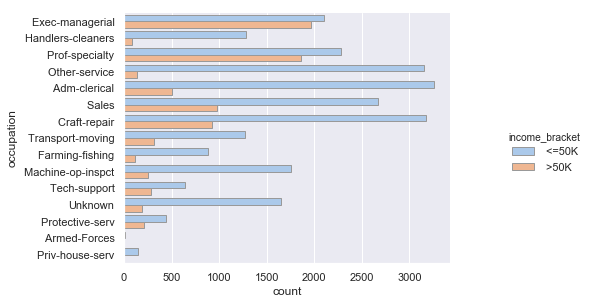

In [25]:
sns.catplot(
    y="occupation",
    hue="income_bracket",
    kind="count",
    palette="pastel",
    edgecolor=".6",
    data=train,
).fig.set_size_inches(10, 4)

In [26]:
OC = train.pivot_table(values="target", index="occupation", aggfunc="mean")
OC["num"] = (OC.target * 16).round()
OC

,target,num
occupation,,
Adm-clerical,0.134518,2.0
Armed-Forces,0.111111,2.0
Craft-repair,0.226641,4.0
Exec-managerial,0.484014,8.0
Farming-fishing,0.115694,2.0
Handlers-cleaners,0.062774,1.0
Machine-op-inspct,0.124875,2.0
Other-service,0.041578,1.0
Priv-house-serv,0.006711,0.0


In [27]:
train['occupation_num'] = train.occupation.map (OC.num)

##### Race

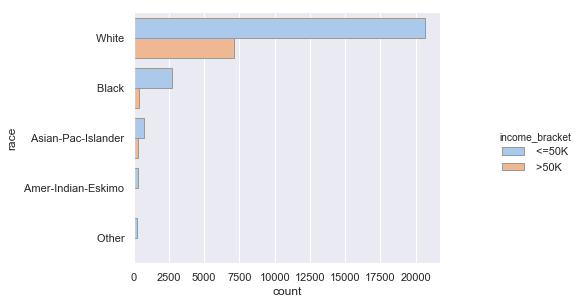

In [28]:
sns.catplot(
    y="race",
    hue="income_bracket",
    kind="count",
    palette="pastel",
    edgecolor=".6",
    data=train,
).fig.set_size_inches(10, 4)

In [29]:
R = train.pivot_table(values="target", index="race", aggfunc="mean")
R["num"] = (R.target * 16).round()
R

,target,num
race,,
Amer-Indian-Eskimo,0.115756,2.0
Asian-Pac-Islander,0.265640,4.0
Black,0.123880,2.0
Other,0.092251,1.0
White,0.255869,4.0


In [30]:
train['race_num'] = train.race.map (R.num)

##### Gender

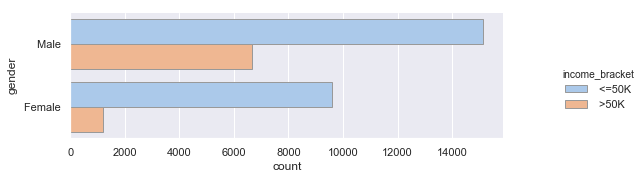

In [31]:
sns.catplot(
    y="gender",
    hue="income_bracket",
    kind="count",
    palette="pastel",
    edgecolor=".6",
    data=train,
).fig.set_size_inches(10, 2)

In [32]:
G = train.pivot_table(values="target", index="gender", aggfunc="mean")
G["num"] = (G.target * 16).round()
G

,target,num
gender,,
Female,0.109461,2.0
Male,0.305751,5.0


In [33]:
train['gender_num'] = train.gender.map (G.num)

In [34]:
NC = train.pivot_table(values="target", index="native_country", aggfunc="mean"
                 ).sort_values(by="target", ascending=False)
NC["num"] = (NC.target * 16).round()
NC

,target,num
native_country,,
Iran,0.418605,7.0
France,0.413793,7.0
India,0.400000,6.0
Taiwan,0.392157,6.0
Japan,0.387097,6.0
Yugoslavia,0.375000,6.0
Cambodia,0.368421,6.0
Italy,0.342466,5.0
England,0.333333,5.0


In [35]:
train["native_country_num"] = train.native_country.map(NC.num)

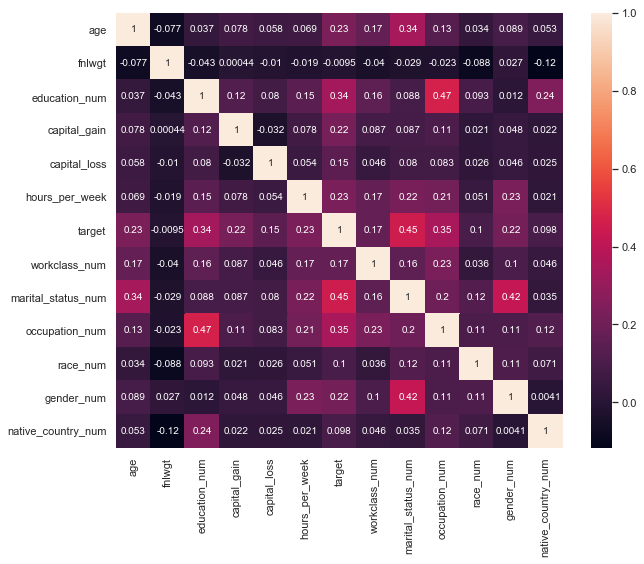

In [36]:
corrmatrix = train.corr(method='pearson')
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True);

In [37]:
corrmatrix['target'].sort_values(ascending = False)

target                1.000000
marital_status_num    0.446898
occupation_num        0.349976
education_num         0.335182
age                   0.234039
hours_per_week        0.229690
capital_gain          0.223333
gender_num            0.215995
workclass_num         0.173748
capital_loss          0.150523
race_num              0.100480
native_country_num    0.098004
fnlwgt               -0.009481
Name: target, dtype: float64

In [38]:
train2 = train[
    [
        "marital_status_num",
        "education_num",
        "occupation_num",
        "age",
        "hours_per_week",
        "capital_gain",
        "gender_num",
        "workclass_num",
        "capital_loss",
    ]
]
train2.head()

,marital_status_num,education_num,occupation_num,age,hours_per_week,capital_gain,gender_num,workclass_num,capital_loss
0,7.0,13,8.0,50,13,0,5.0,5.0,0
1,2.0,9,1.0,38,40,0,5.0,3.0,0
2,7.0,7,1.0,53,40,0,5.0,3.0,0
3,7.0,13,7.0,28,40,0,2.0,3.0,0
4,7.0,14,8.0,37,40,0,2.0,3.0,0


### Linear Regression

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    train2, train["target"], random_state=60, test_size=0.2
)
(x_train.shape, x_test.shape)

((26048, 9), (6512, 9))

In [40]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test);

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [43]:
accuracy_score(y_train_pred, y_train)

0.847281941031941

In [44]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     19752
           1       0.73      0.58      0.65      6296

   micro avg       0.85      0.85      0.85     26048
   macro avg       0.80      0.76      0.78     26048
weighted avg       0.84      0.85      0.84     26048



### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(x_train,y_train)
y_train_pred = randomForest.predict(x_train)

In [46]:
accuracy_score(y_train_pred, y_train)

0.9669456388206388

In [47]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     19752
           1       0.95      0.91      0.93      6296

   micro avg       0.97      0.97      0.97     26048
   macro avg       0.96      0.95      0.95     26048
weighted avg       0.97      0.97      0.97     26048



In [48]:
test['marital_status_num'] = test.marital_status.map (MS.num)

In [49]:
test['occupation_num'] = test.occupation.map(OC.num)

In [50]:
test['gender_num'] = test.gender.map(G.num)

In [51]:
test['workclass_num'] = test.workclass.map(WC.num)

In [52]:
test2 = test[
    [
        "marital_status_num",
        "education_num",
        "occupation_num",
        "age",
        "hours_per_week",
        "capital_gain",
        "gender_num",
        "workclass_num",
        "capital_loss",
    ]
]
test2.head()

,marital_status_num,education_num,occupation_num,age,hours_per_week,capital_gain,gender_num,workclass_num,capital_loss
0,7.0,9,2.0,38,50,0,5.0,3.0,0
1,7.0,12,5.0,28,40,0,5.0,5.0,0
2,7.0,10,2.0,44,40,7688,5.0,3.0,0
3,1.0,10,2.0,18,30,0,2.0,2.0,0
4,1.0,6,1.0,34,30,0,5.0,3.0,0


In [53]:
scaler.fit (test2)
test2 = scaler.transform (test2)

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [54]:
y_new_pred = randomForest.predict(test2)

In [55]:
y_new_pred = pd.Series (y_new_pred, name="new_target")

In [56]:
test = pd.concat ([test, y_new_pred], axis=1)

In [57]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,marital_status_num,occupation_num,gender_num,workclass_num,new_target
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,7.0,2.0,5.0,3.0,1
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,7.0,5.0,5.0,5.0,1
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,7.0,2.0,5.0,3.0,1
3,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K.,1.0,2.0,2.0,2.0,0
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,1.0,1.0,5.0,3.0,0


In [58]:
OT = {' <=50K.': 0, ' >50K.': 1}

In [59]:
test['old_target'] = test.income_bracket.map(OT)

In [64]:
test.pivot_table(
    values="income_bracket", index=["new_target", "old_target"], aggfunc="count"
)

income_bracket
new_target old_target                
0          0                    11418
           1                     1482
1          0                     1016
           1                     2364